<a href="https://colab.research.google.com/github/Macleyn/ML/blob/main/%D0%A6%D0%9A_%D0%9C%D0%A4%D0%A2%D0%98/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering, KMeans

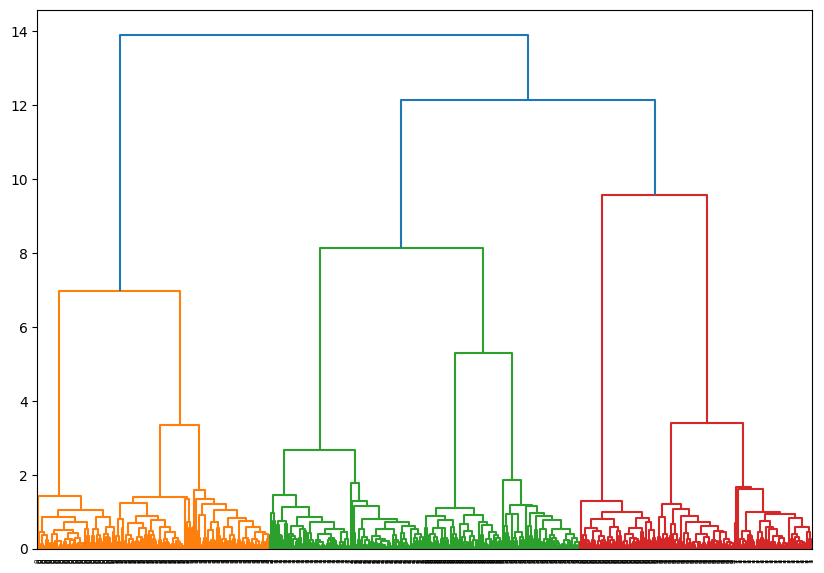

In [ ]:
df = pd.read_csv('dataset2.csv')
features = df[['F0', 'F1']]
linked = linkage(features, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df['LABEL'].values, distance_sort='ascending', show_leaf_counts=True)
plt.show()



In [ ]:
px.scatter(
    df,
    x='F1',
    y='F0',
    color='LABEL'
)

In [ ]:
agg = AgglomerativeClustering(n_clusters=4)
predict = agg.fit_predict(features)
predict_df = pd.DataFrame(predict, columns=['Cluster'])
result = pd.concat([features.reset_index(drop=True), predict_df], axis=1)

px.scatter(
    result,
    x='F1',
    y='F0',
    color='Cluster'

)

In [ ]:
result.groupby('Cluster').size()

,0
Cluster,
0,240
1,180
2,120
3,60


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Выполняем кластеризацию K-means
kmeans = KMeans(n_clusters=4, random_state=42)
pred = kmeans.fit_predict(features)

# Создаем DataFrame с результатами
resultk = pd.concat([
    features.reset_index(drop=True),
    pd.DataFrame(pred, columns=['Cluster'])
], axis=1)

# Создаем scatter plot для точек данных
fig = px.scatter(
    resultk,
    x='F1',
    y='F0',
    color='Cluster',
    title='K-means Clustering (K=4)',
    opacity=0.7
)

# Добавляем центроиды кластеров
fig.add_trace(
    go.Scatter(
        x=kmeans.cluster_centers_[:, 1],  # Ось X (F1)
        y=kmeans.cluster_centers_[:, 0],  # Ось Y (F0)
        mode='markers',
        marker=dict(
            color='black',
            size=12,
            symbol='x',
            line=dict(width=2)
        ),
        name='Cluster Centers'
    )
)

# Настраиваем легенду и оси
fig.update_layout(
    legend_title_text='Cluster',
    xaxis_title='Feature F1',
    yaxis_title='Feature F0'
)

fig.show()